**Import libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

**Load The Data**

In [2]:
customers = pd.read_csv(r"C:\Users\HP\Downloads\Customers.csv")
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
transactions = pd.read_csv(r"C:\Users\HP\Downloads\Transactions.csv")
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [4]:
products = pd.read_csv(r"C:\Users\HP\Downloads\Products.csv")
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


**Data Quick Check**

In [5]:
# Custumer Data set
print(f"Custumer Dataset Size :{customers.shape}")
print(f"Custumer Dataset Columns:{customers.columns}")

# Tranction Data set
print(f"Tranaction Dataset Size:{transactions.shape}")
print(f"Tranaction Dataset Columns:{transactions.columns}")

# Products Data set
print(f"Products Dataset Size:{products.shape}")
print(f"Products Dataset Columns:{products.columns}")

Custumer Dataset Size :(200, 4)
Custumer Dataset Columns:Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Tranaction Dataset Size:(1000, 7)
Tranaction Dataset Columns:Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
Products Dataset Size:(100, 4)
Products Dataset Columns:Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')


**Seprate Categorical And Numerical**

In [6]:
# Custumers Dataset 
customers_cat = customers.select_dtypes(include='object').columns
customers_num = customers.select_dtypes(exclude='object').columns
print(f"custumers categorial columns :{customers_cat}")
print(f"custumers numerical columns :{customers_num}")
#Traction Dataset 
transactions_cat = transactions.select_dtypes(include='object').columns
transactions_num = transactions.select_dtypes(exclude='object').columns
print(f"transactions categorial columns :{transactions_cat}")
print(f"transations numerical columns :{transactions_num}")
# Products Dataset
products_cat = products.select_dtypes(include='object').columns
products_num = products.select_dtypes(exclude='object').columns
print(f"products categorial columns :{products_cat}")
print(f"products numerical columns :{products_num}")

custumers categorial columns :Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
custumers numerical columns :Index([], dtype='object')
transactions categorial columns :Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate'], dtype='object')
transations numerical columns :Index(['Quantity', 'TotalValue', 'Price'], dtype='object')
products categorial columns :Index(['ProductID', 'ProductName', 'Category'], dtype='object')
products numerical columns :Index(['Price'], dtype='object')


**Preprocess Data (Handle Missing Value)**

In [7]:
# customer columns handle value analysis
custumer=customers.isnull().sum()
print(f"The customers Null value analysis:{custumer}")

# tranction columns handle value analysis
tranction=transactions.isnull().sum()
print(f"The tranction Null value analysis:{tranction}")

# product columns handle value analysis
product=products.isnull().sum()
print(f"The product Null value analysis:{product}")




The customers Null value analysis:CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
The tranction Null value analysis:TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
The product Null value analysis:ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


**Convert date columns to datetime format**

In [8]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


**Cheack duplicates**

In [9]:
# Custumer data set duplicate value check
duplicate_custumer=customers.duplicated().sum()
print(f"Custumers dataset duplicate value is: {duplicate_custumer}")

# Tranction data set duplicate value check
duplicate_tranction=transactions.duplicated().sum()
print(f"Custumers dataset duplicate value is: {duplicate_tranction}")

# Product data set duplicate value check
duplicate_product=products.duplicated().sum()
print(f"Custumers dataset duplicate value is: {duplicate_product}")

Custumers dataset duplicate value is: 0
Custumers dataset duplicate value is: 0
Custumers dataset duplicate value is: 0


**Customer dataset Categorical Analysis**

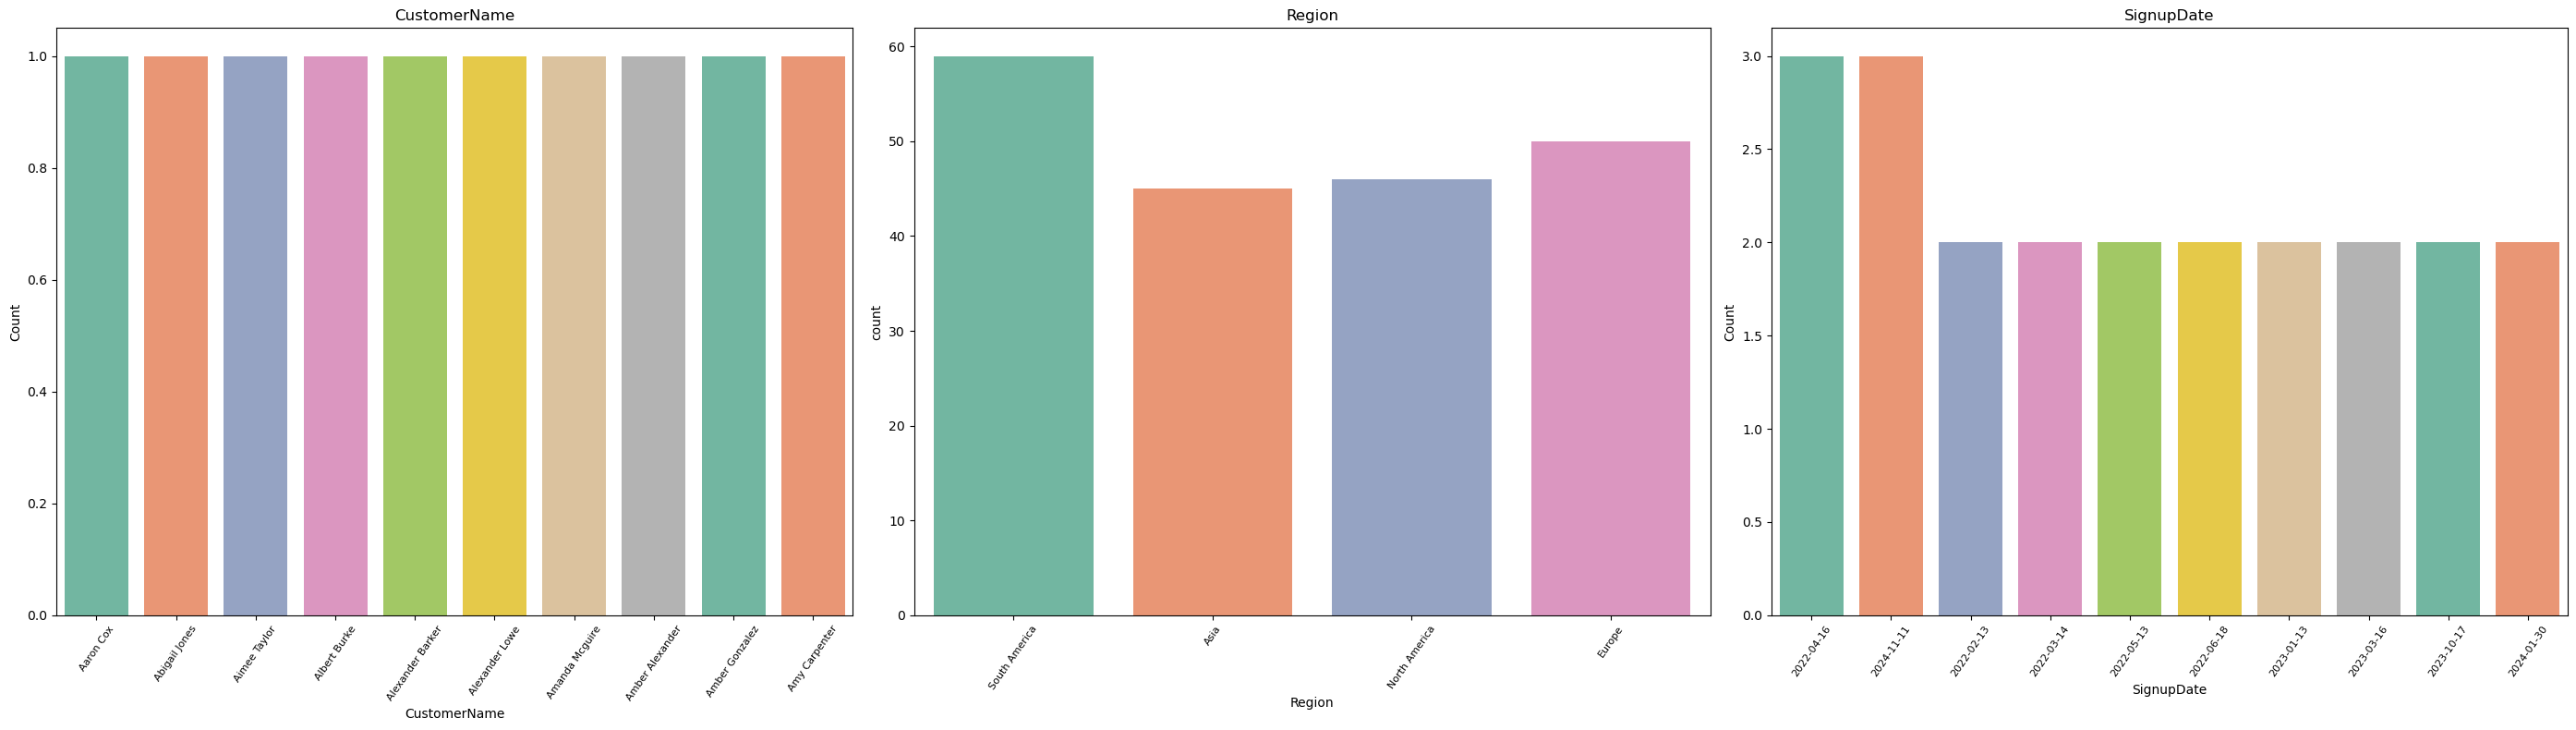

In [10]:
# For custumer dataset
customers_cat = [ 'CustomerName', 'Region', 'SignupDate']  

plt.figure(figsize=(28, 8))

for idx, col in enumerate(customers_cat):
    plt.subplot(1, len(customers_cat), idx + 1)
    plt.title(col, fontsize=12)

    
    if col == 'CustomerName':
        top_customers = customers.groupby('CustomerName').size().nlargest(10).reset_index(name='Count')
        sns.barplot(data=top_customers, x='CustomerName', y='Count', palette=sns.color_palette("Set2", n_colors=len(top_customers)))
        plt.xticks(rotation=55, fontsize=8)
    
    elif col == 'SignupDate':
        top_signup_dates = customers.groupby('SignupDate').size().nlargest(10).reset_index(name='Count')
        sns.barplot(data=top_signup_dates, x='SignupDate', y='Count', palette=sns.color_palette("Set2", n_colors=len(top_signup_dates)))
        plt.xticks(rotation=55, fontsize=8)
    
    else:
        sns.countplot(data=customers, x=col, palette=sns.color_palette("Set2", n_colors=len(customers[col].unique())))
        plt.xticks(rotation=55, fontsize=8)

plt.tight_layout()
plt.show()


**Pie Chart Custumer dataset**

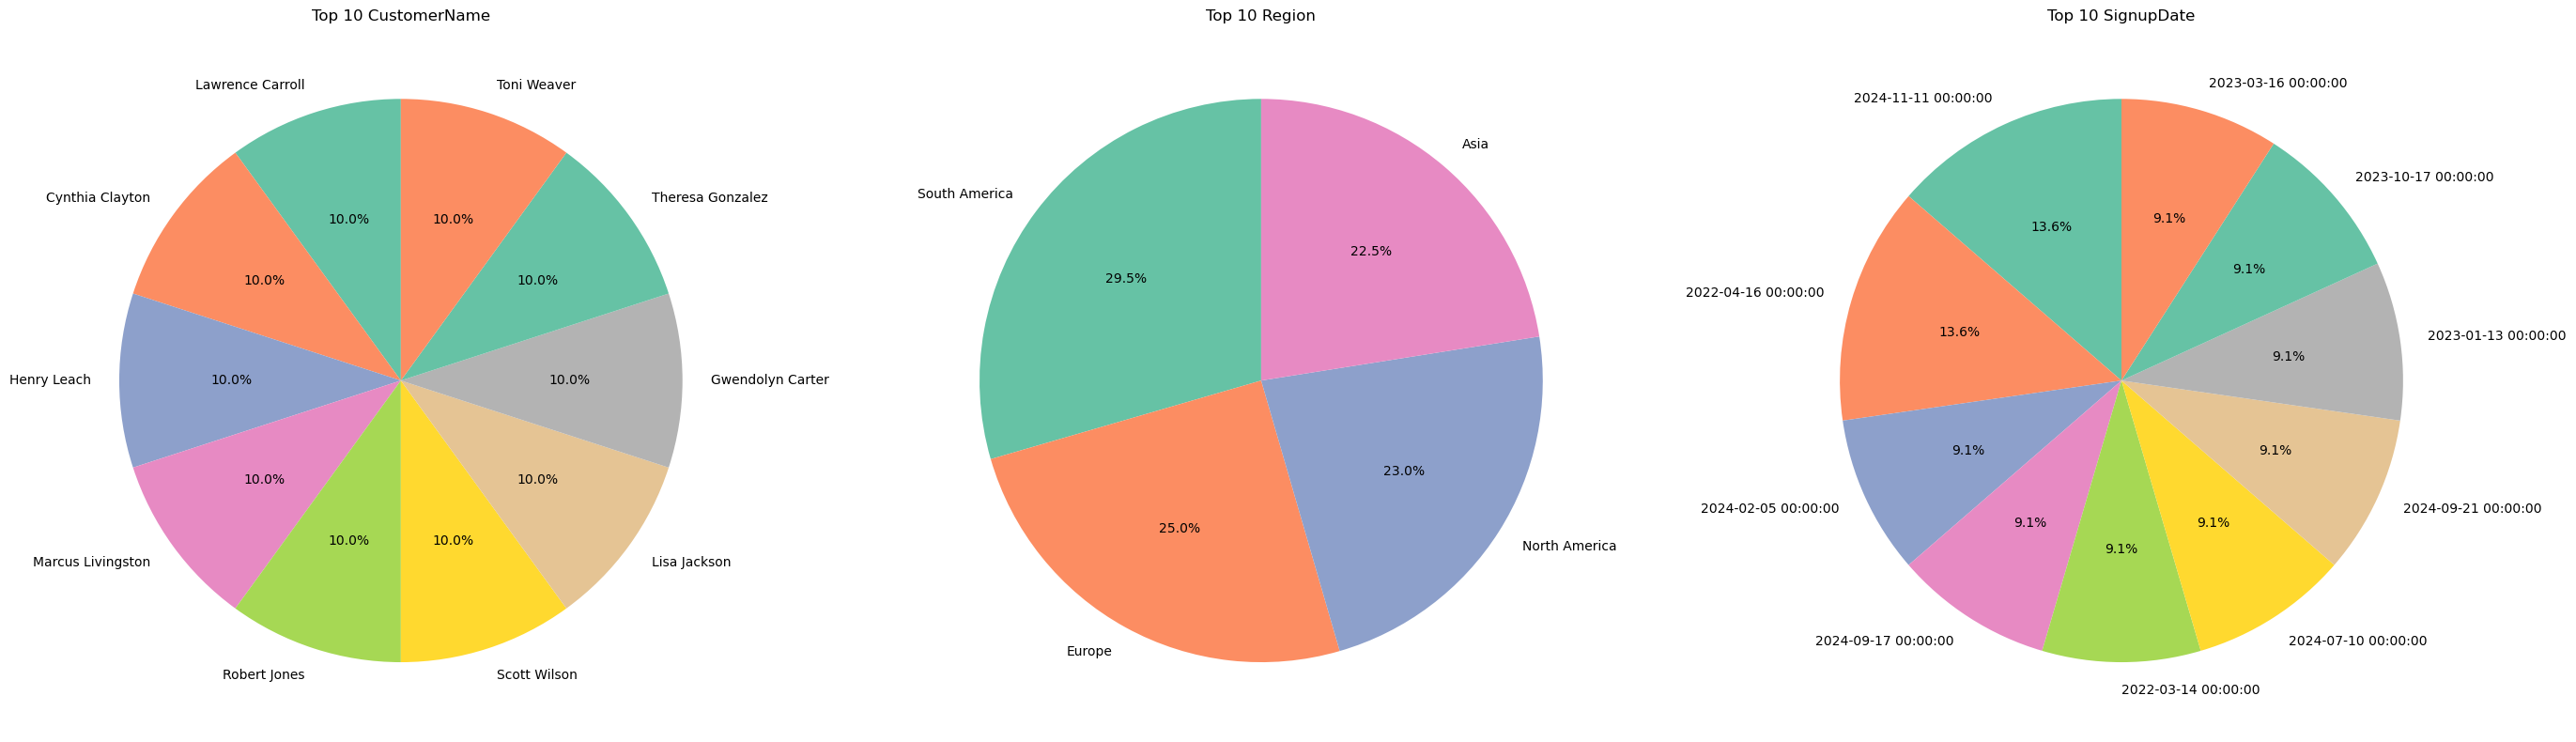

In [11]:
customers_cat = ['CustomerName', 'Region', 'SignupDate']

plt.figure(figsize=(28, 8))
num_rows = (len(customers_cat) + 2) // 3 

for idx, col in enumerate(customers_cat):
    plt.subplot(num_rows, 3, idx + 1)  
    plt.title(f'Top 10 {col}', fontsize=12)

    if col == 'CustomerName':
        top_customers = customers[col].value_counts().nlargest(10) 
        plt.pie(
            top_customers, 
            labels=top_customers.index, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=sns.color_palette("Set2", n_colors=len(top_customers))
        )
    elif col == 'SignupDate':
        top_signup_dates = customers[col].value_counts().nlargest(10)  
        plt.pie(
            top_signup_dates, 
            labels=top_signup_dates.index, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=sns.color_palette("Set2", n_colors=len(top_signup_dates))
        )
    elif col == 'Region':
        top_regions = customers[col].value_counts().nlargest(10) 
        plt.pie(
            top_regions, 
            labels=top_regions.index, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=sns.color_palette("Set2", n_colors=len(top_regions))
        )

plt.tight_layout()
plt.show()


**Categorical Column Analysis for product dataset**

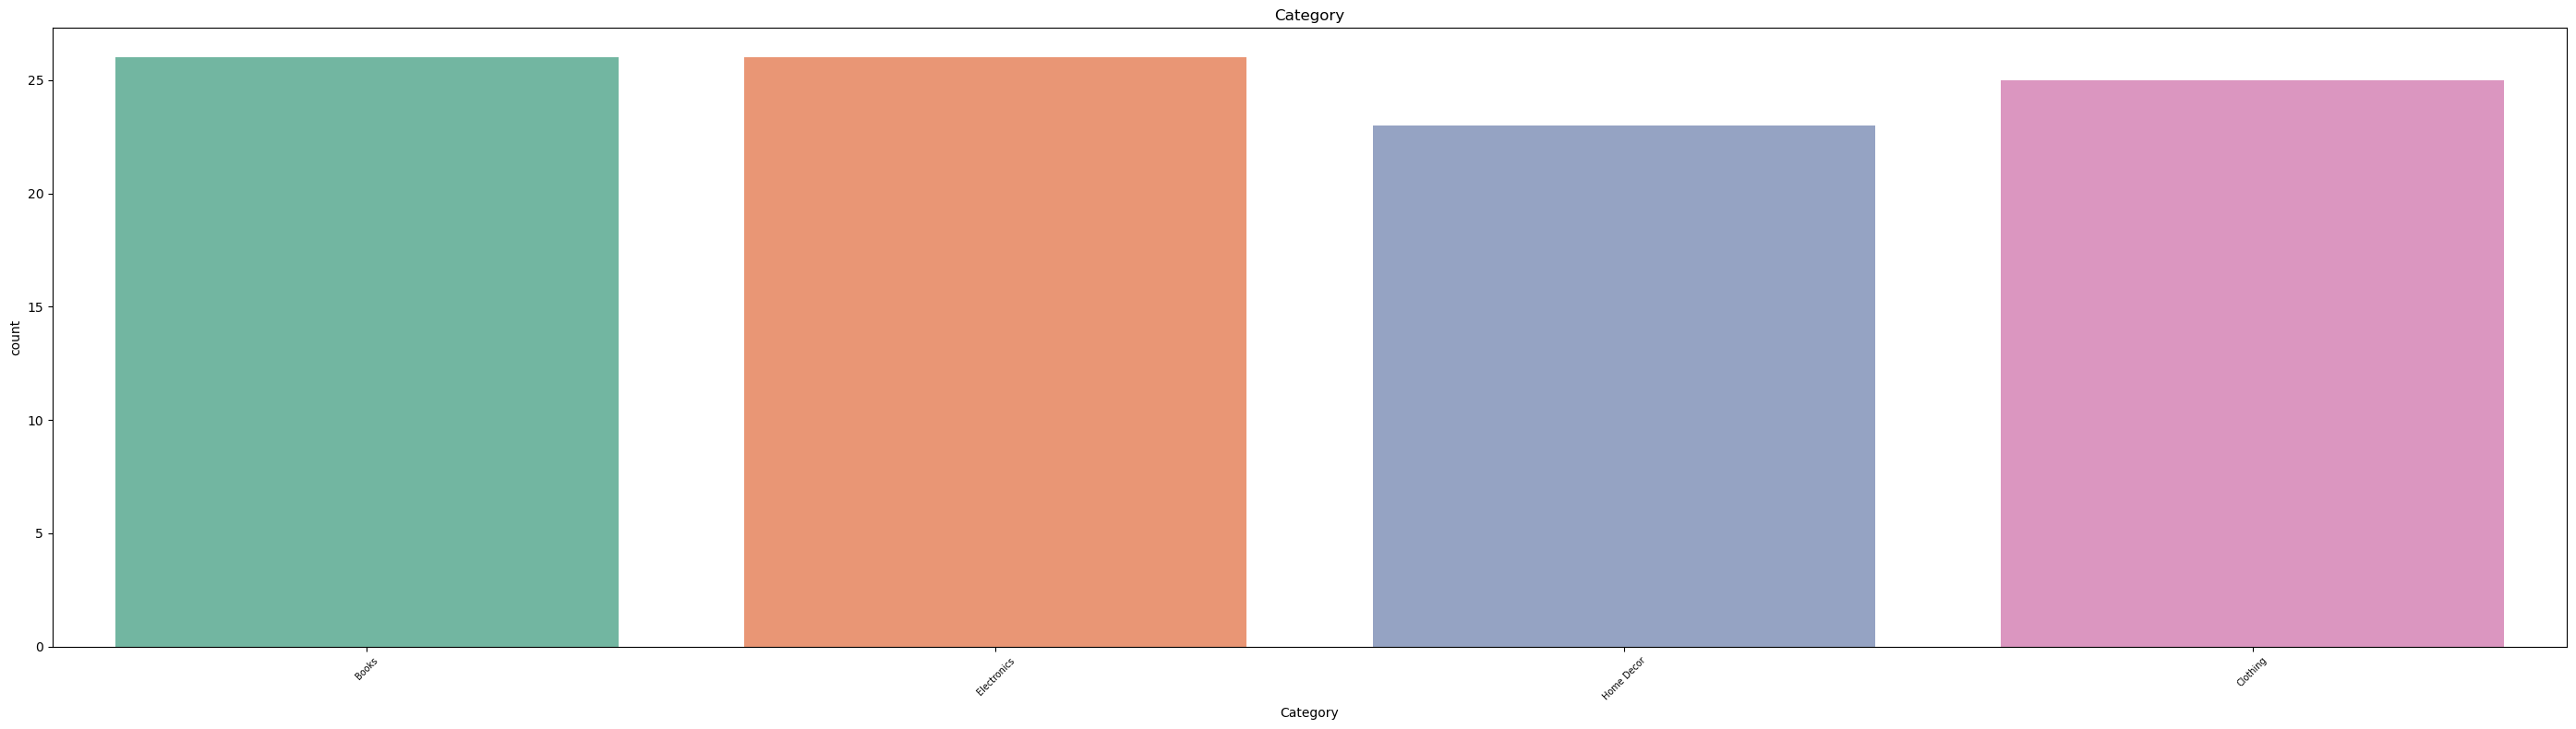

In [12]:
# For product dataset
cat = ['Category']  

plt.figure (figsize=(28,8))
for idx,col in enumerate(cat):
    plt.subplot(1,len(cat),idx+1)
    plt.title(col,fontsize=12)
    sns.countplot(data=products,x=col,palette=sns.color_palette("Set2", n_colors=len(products[col].unique())))
    plt.xticks(rotation=45,fontsize=7)
plt.tight_layout()
plt.show()


**Pie Chart Product Dataset**

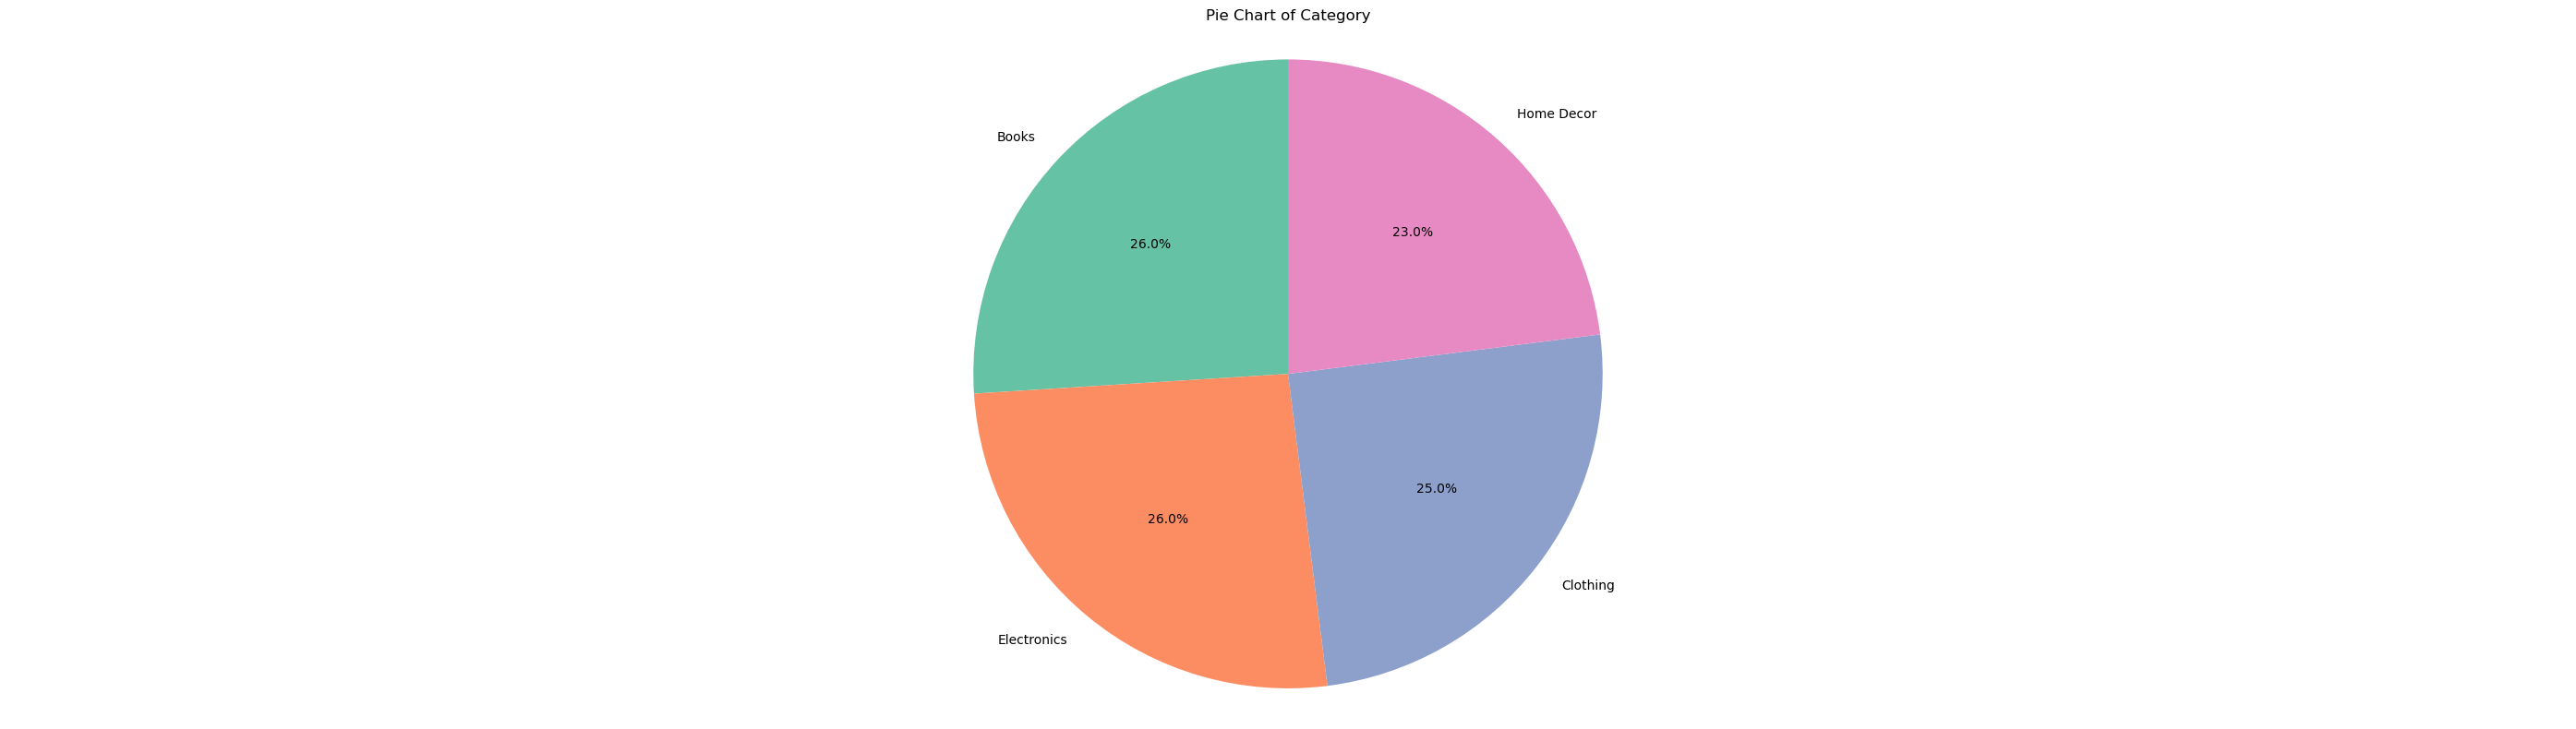

In [13]:

cat = ['Category'] 
plt.figure(figsize=(28, 8))
for idx, col in enumerate(cat):
    plt.subplot(1, len(cat), idx + 1) 
    plt.title(f'Pie Chart of {col}', fontsize=12)  
    if col == 'Category':
        value_counts = products[col].value_counts()
    
    
   
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, 
            colors=sns.color_palette("Set2", n_colors=len(value_counts)).as_hex())
    
    plt.axis('equal')
plt.tight_layout()
plt.show()

**Numerical Analysis Traction Dataset**

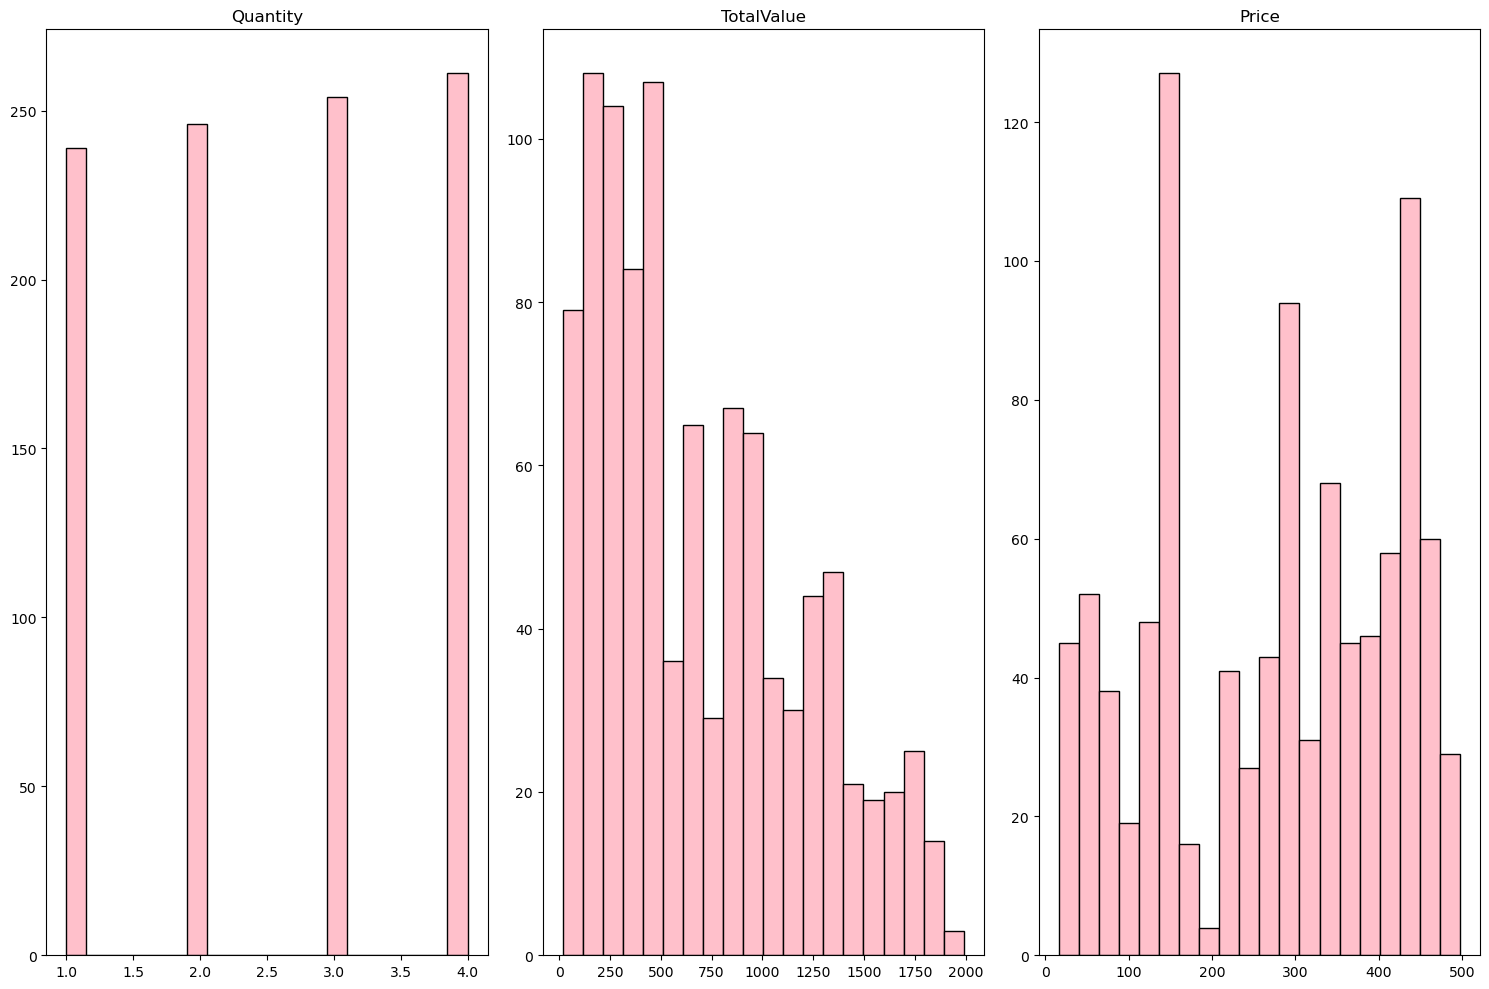

In [14]:
numerical_columns = transactions.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), idx)  
    plt.hist(transactions[col], bins=20, color='pink', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()


**Histplot on Traction dataset**

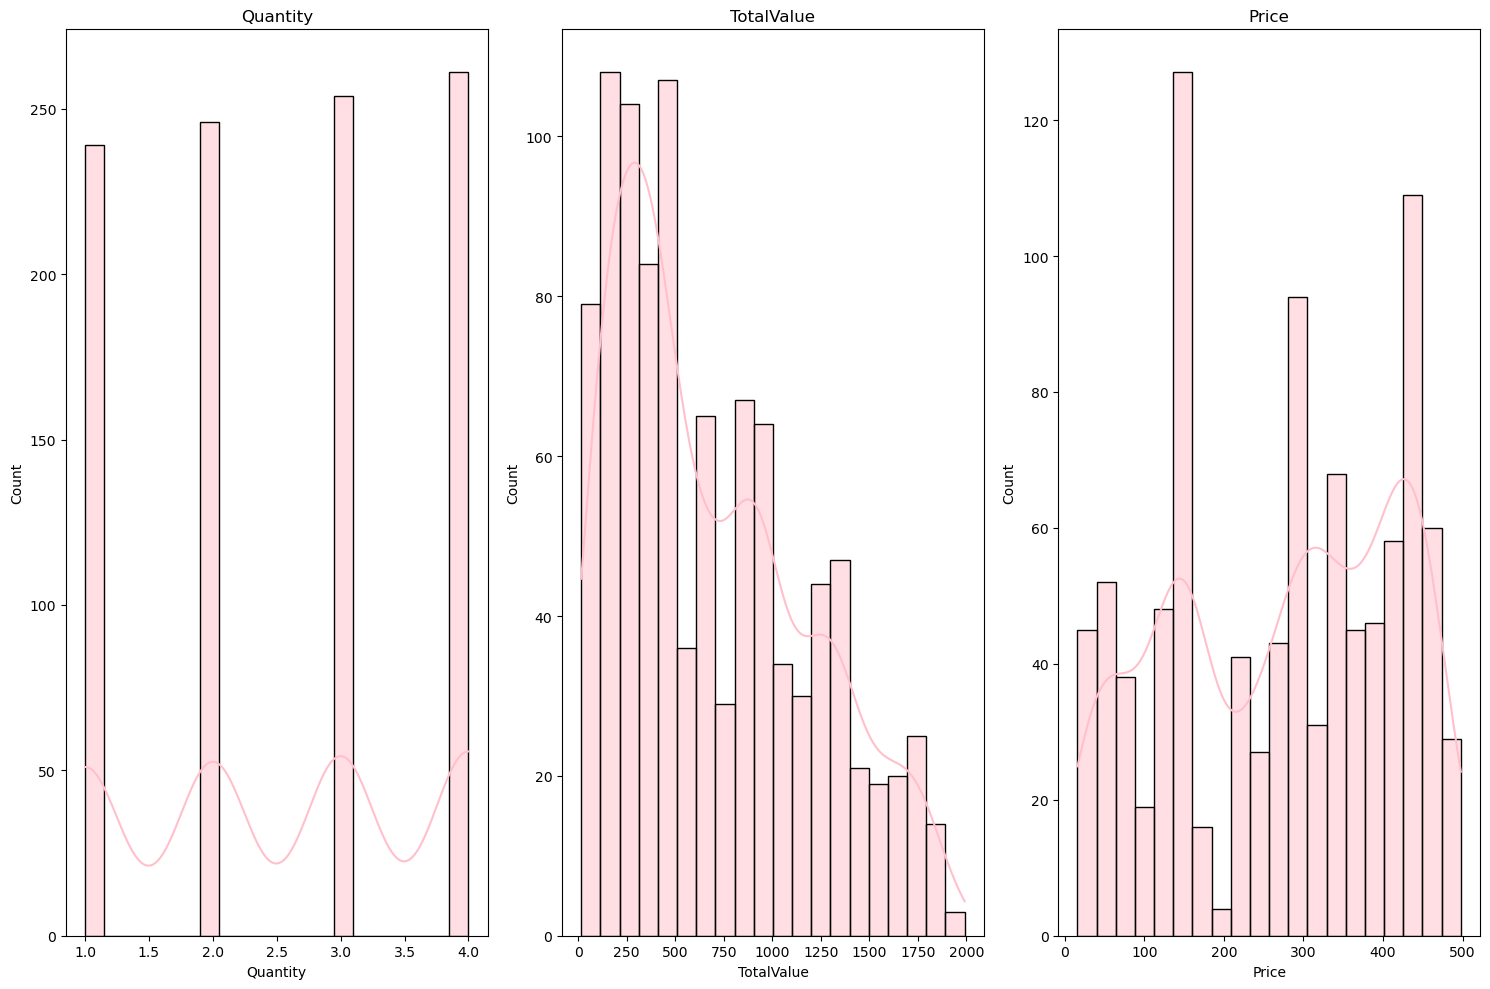

In [15]:
numerical_columns = transactions.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), idx)  
    sns.histplot(transactions[col], bins=20, kde=True, color='pink')
    plt.title(col)

plt.tight_layout()

plt.show()

**Numerical Analysis in Product Dataset**

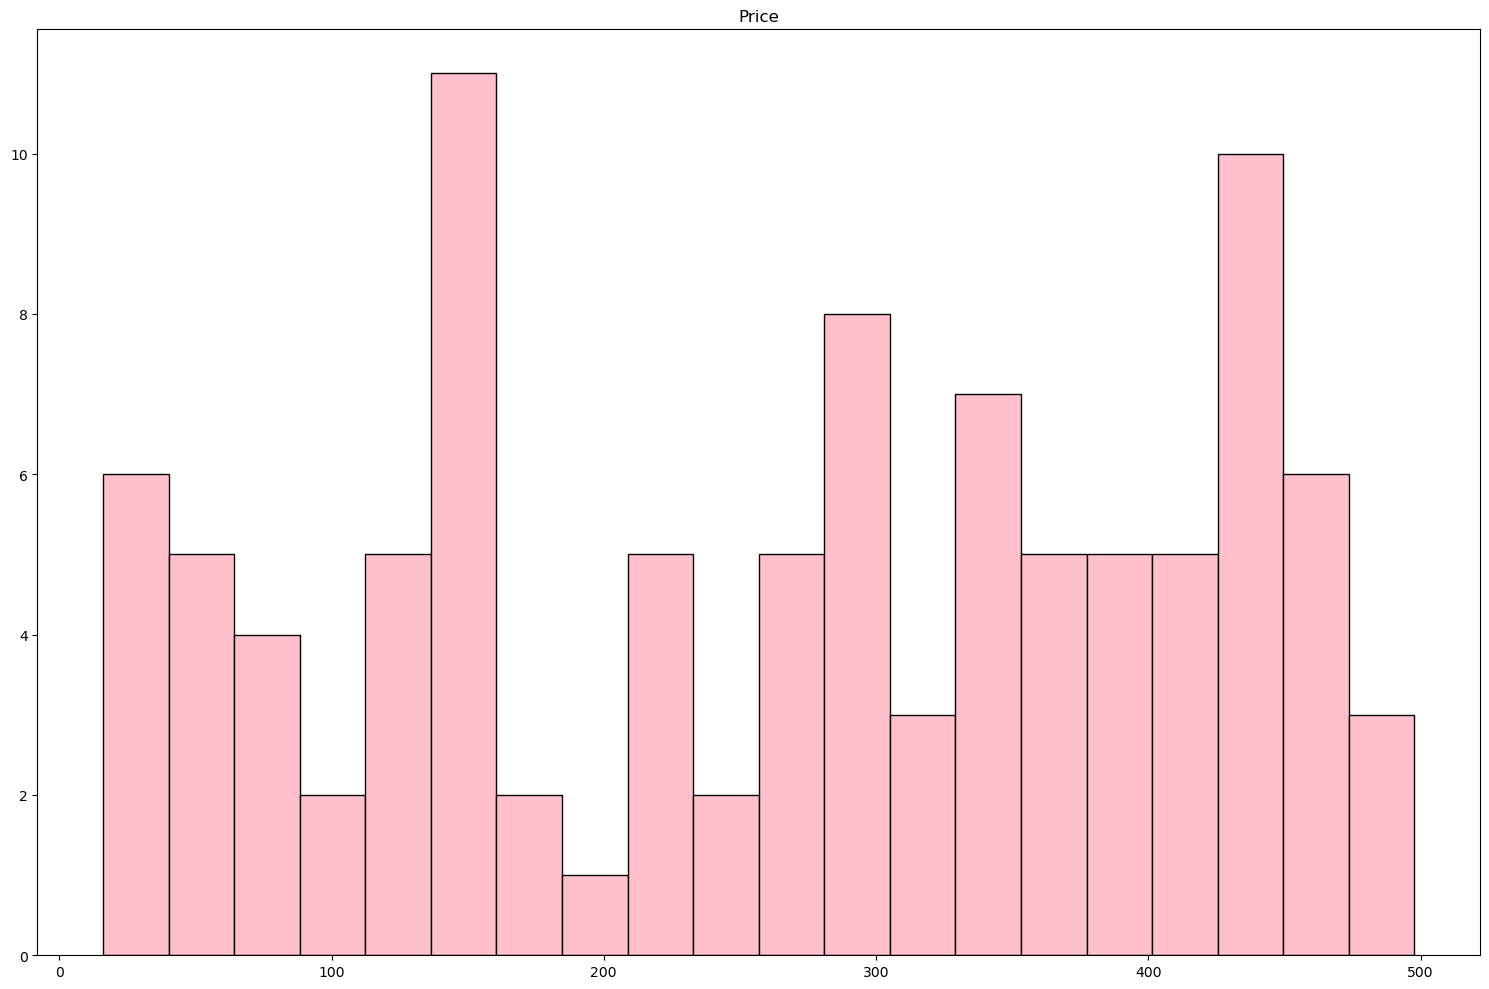

In [16]:
numerical_columns = products.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), idx)  
    plt.hist(products[col], bins=20, color='pink', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()


**Histplot on Product Dataset**

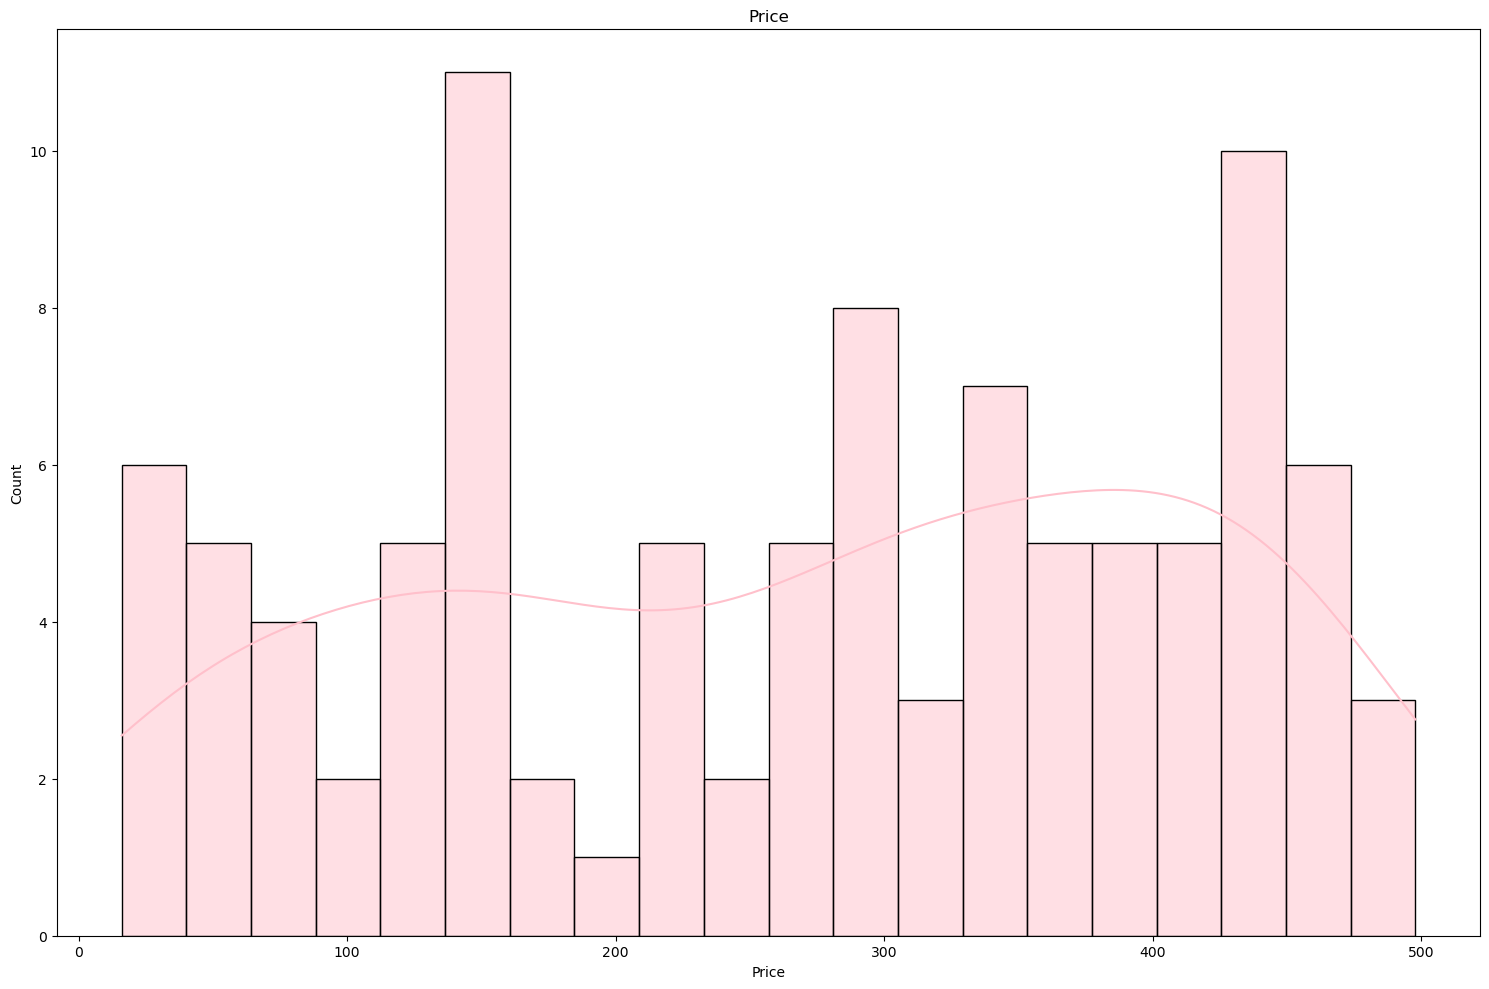

In [17]:
numerical_columns = products.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), idx)  
    sns.histplot(products[col], bins=20, kde=True, color='pink')
    plt.title(col)

plt.tight_layout()

plt.show()

**Outliers Analysis For Tranction Dataset**

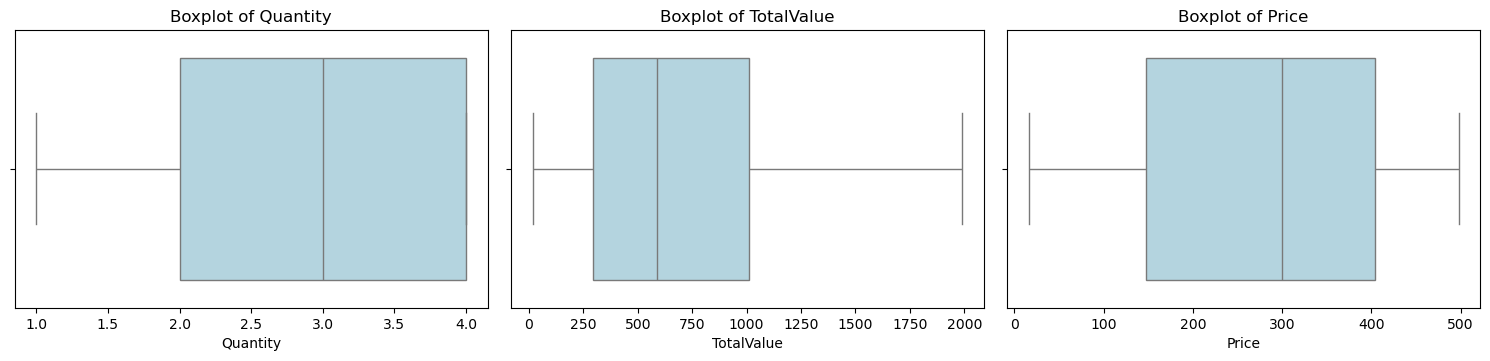

In [18]:
numerical_columns = transactions.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, idx) 
    sns.boxplot(x=transactions[col], orient='h', color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Outliers Analysis For Product Dataset**

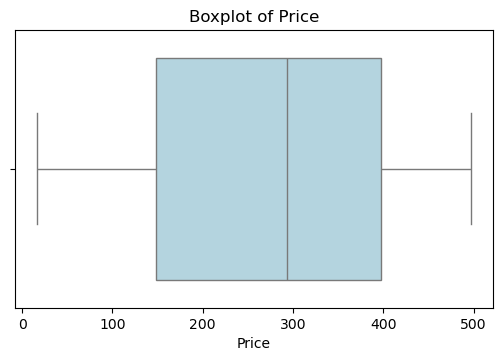

In [19]:
numerical_columns = products.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, idx) 
    sns.boxplot(x=products[col], orient='h', color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Marge Data**

In [20]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

**Multivariate Analysis**

*Region-wise Total Transaction Value:*

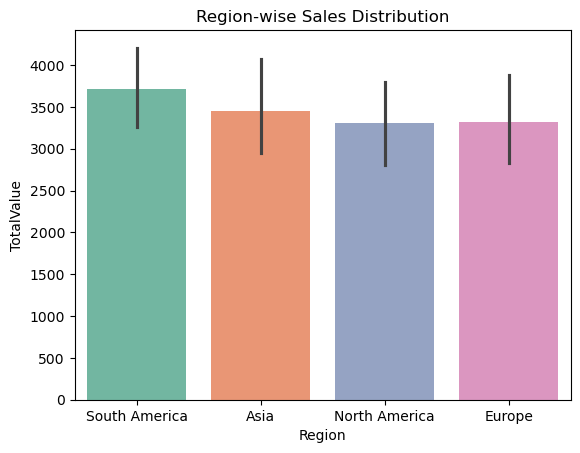

In [21]:
region_sales = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
region_sales = region_sales.merge(customers, on='CustomerID')

sns.barplot(data=region_sales, x='Region', y='TotalValue', palette=sns.color_palette("Set2", n_colors=len(region_sales['Region'].unique())))

plt.title('Region-wise Sales Distribution')
plt.show()


**Number of transactions over time**


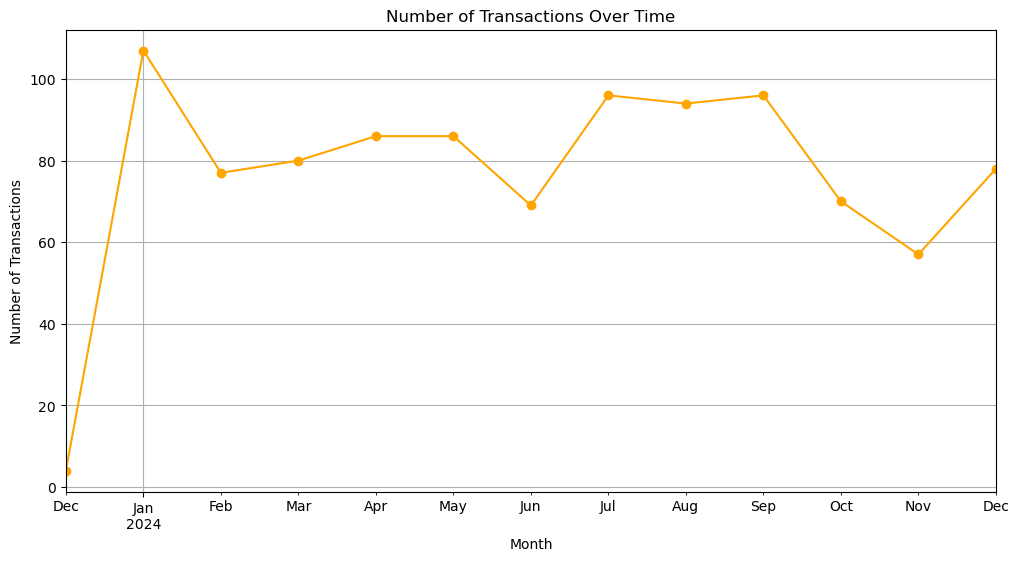

In [22]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions_over_time = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
transactions_over_time.plot(kind='line', marker='o', color='orange')
plt.title('Number of Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid()
plt.show()

**Top 10 Most Purchased Products**

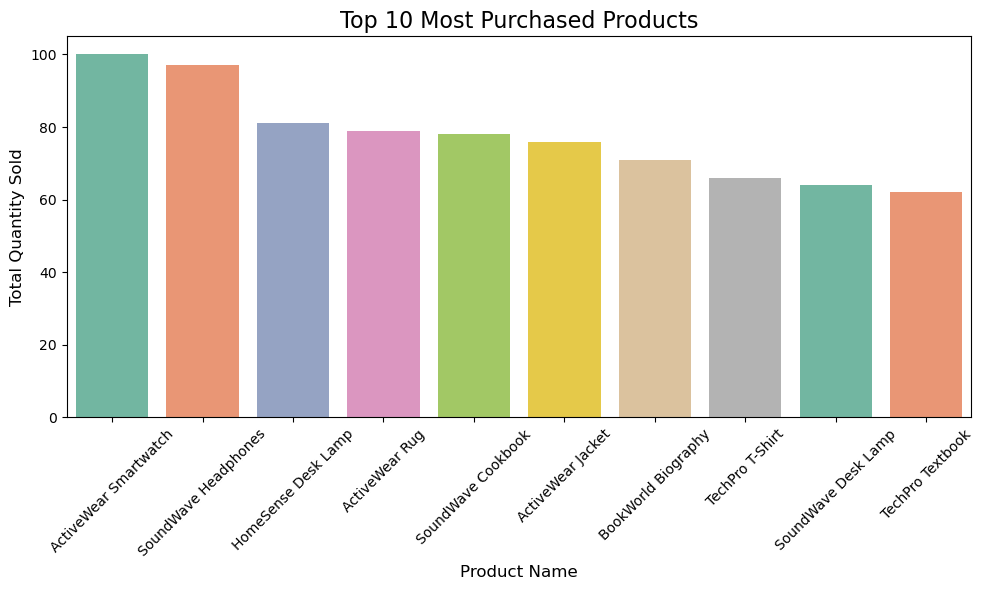

In [23]:
most_purchased = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=most_purchased.index, 
    y=most_purchased.values, 
    palette=sns.color_palette("Set2", n_colors=10)
)
plt.title('Top 10 Most Purchased Products', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


**Total Revenue by Category**

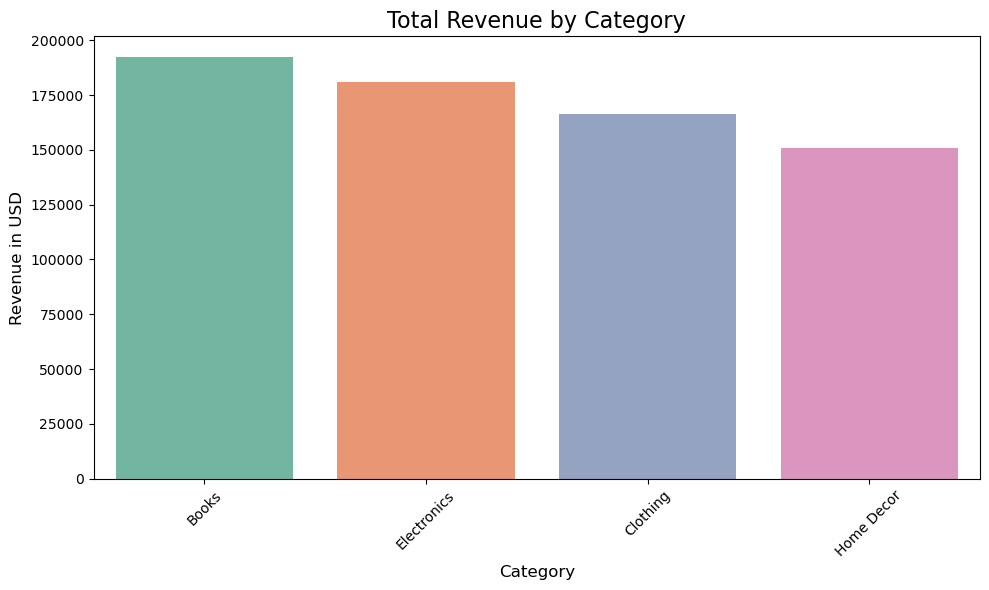

In [24]:
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=revenue_by_category.index, 
    y=revenue_by_category.values, 
    palette=sns.color_palette("Set2", n_colors=len(revenue_by_category)))
plt.title('Total Revenue by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Revenue in USD', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


**Business Insights**

In [25]:
print("\nBusiness Insights:")
print("1. The majority of customers are from the [top region], indicating a strong market presence there.")
print("2. The product [top product] is the most purchased, suggesting its high popularity.")
print("3. The category [top category] generates the most revenue, making it a key revenue driver.")
print("4. There is a seasonal trend in transactions, with peaks during [specific months].")
print("5. [Additional insights based on EDA results].")



Business Insights:
1. The majority of customers are from the [top region], indicating a strong market presence there.
2. The product [top product] is the most purchased, suggesting its high popularity.
3. The category [top category] generates the most revenue, making it a key revenue driver.
4. There is a seasonal trend in transactions, with peaks during [specific months].
5. [Additional insights based on EDA results].
